# 연구과제(기본그래프) 풀이

## #01. 준비작업

### [1] 패키지 참조

In [304]:
import sys
import datetime as dt
import seaborn as sb
from pandas import read_excel, to_datetime
from matplotlib import pyplot as plt

### [2] 그래프 전역 설정

In [305]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 9
plt.rcParams["figure.figsize"] = (15, 6)
plt.rcParams["figure.dpi"] = 200
plt.rcParams["axes.unicode_minus"] = False

### [3] 데이터 가져오기

In [306]:
origin = read_excel('https://data.hossam.kr/pydata/covid19_full.xlsx')
origin

,날짜,서울시 누적 확진자,서울시 일일 확진,서울시 치료중,서울시 퇴원,서울시 추가 퇴원,서울시 누적 사망,서울시 일일 사망,전국 누적 확진,전국 일일 확진,전국 치료중,전국 퇴원,전국 당일 사망,전국 누적 사망
0,2023-05-31,6204277,5987.0,0,NaN,NaN,6492,6.0,31703511.0,24411.0,0,NaN,17.0,34784
1,2023-05-30,6198290,3326.0,0,NaN,NaN,6486,1.0,31679100.0,13529.0,0,NaN,7.0,34767
2,2023-05-29,6194964,1393.0,0,NaN,NaN,6485,1.0,31665571.0,6868.0,0,NaN,3.0,34760
3,2023-05-28,6194964,1393.0,0,NaN,NaN,6485,1.0,31665571.0,6868.0,0,NaN,3.0,34760
4,2023-05-27,6191196,4078.0,0,NaN,NaN,6485,0.0,31647238.0,17796.0,0,NaN,3.0,34784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,2020-02-09,10,0.0,10,0.0,0.0,0,NaN,27.0,0.0,24,3.0,NaN,0
1208,2020-02-08,10,0.0,10,0.0,0.0,0,NaN,24.0,0.0,22,2.0,NaN,0
1209,2020-02-07,10,0.0,10,0.0,0.0,0,NaN,24.0,0.0,22,2.0,NaN,0
1210,2020-02-06,11,0.0,11,0.0,0.0,0,NaN,24.0,0.0,23,1.0,NaN,0


In [307]:
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   날짜          1212 non-null   object 
 1   서울시 누적 확진자  1212 non-null   int64  
 2   서울시 일일 확진   1211 non-null   float64
 3   서울시 치료중     1212 non-null   int64  
 4   서울시 퇴원      770 non-null    float64
 5   서울시 추가 퇴원   770 non-null    float64
 6   서울시 누적 사망   1212 non-null   int64  
 7   서울시 일일 사망   458 non-null    float64
 8   전국 누적 확진    1212 non-null   float64
 9   전국 일일 확진    1211 non-null   float64
 10  전국 치료중      1212 non-null   int64  
 11  전국 퇴원       770 non-null    float64
 12  전국 당일 사망    458 non-null    float64
 13  전국 누적 사망    1212 non-null   int64  
dtypes: float64(8), int64(5), object(1)
memory usage: 132.7+ KB


### [4] 데이터 전처리

`날짜` 변수를 `datetime` 타입으로 변환

In [308]:
origin['날짜'] = to_datetime(origin['날짜'])
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   날짜          1212 non-null   datetime64[ns]
 1   서울시 누적 확진자  1212 non-null   int64         
 2   서울시 일일 확진   1211 non-null   float64       
 3   서울시 치료중     1212 non-null   int64         
 4   서울시 퇴원      770 non-null    float64       
 5   서울시 추가 퇴원   770 non-null    float64       
 6   서울시 누적 사망   1212 non-null   int64         
 7   서울시 일일 사망   458 non-null    float64       
 8   전국 누적 확진    1212 non-null   float64       
 9   전국 일일 확진    1211 non-null   float64       
 10  전국 치료중      1212 non-null   int64         
 11  전국 퇴원       770 non-null    float64       
 12  전국 당일 사망    458 non-null    float64       
 13  전국 누적 사망    1212 non-null   int64         
dtypes: datetime64[ns](1), float64(8), int64(5)
memory usage: 132.7 KB


## #02. 데이터 전처리

### [1] 검색 날짜 변수 생성

#### (1) 날짜 입력받기

In [309]:
input_date = input("검색일을 입력하세요(yyyymmdd)")
print(type(input_date))
input_date

<class 'str'>


'20211001'

#### (2) 입력받은 날짜를 datetime 객체로 생성

In [310]:
start_date = dt.datetime.strptime(input_date, '%Y%m%d')
print(type(start_date))
print(start_date)

<class 'datetime.datetime'>
2021-10-01 00:00:00


### [2] 검색 종료일 구하기

In [311]:
delta = dt.timedelta(days=6)
end_date = start_date + delta
print(type(end_date))
print(end_date)

<class 'datetime.datetime'>
2021-10-07 00:00:00


### [3] 검색 기간에 따른 데이터 추출

In [312]:
query_df = origin.query('날짜 >= @start_date and 날짜 <= @end_date')
df = query_df.sort_values('날짜')
df

,날짜,서울시 누적 확진자,서울시 일일 확진,서울시 치료중,서울시 퇴원,서울시 추가 퇴원,서울시 누적 사망,서울시 일일 사망,전국 누적 확진,전국 일일 확진,전국 치료중,전국 퇴원,전국 당일 사망,전국 누적 사망
607,2021-10-01,101411,916.0,14332,86430.0,529.0,649,NaN,313773.0,2486.0,35700,275576.0,NaN,2497
606,2021-10-02,102204,793.0,14561,86990.0,560.0,653,NaN,316020.0,2248.0,36424,277092.0,NaN,2504
605,2021-10-03,102939,736.0,14670,87614.0,624.0,655,NaN,318104.0,2085.0,36750,278847.0,NaN,2507
604,2021-10-04,103512,574.0,14650,88206.0,592.0,656,NaN,319777.0,1673.0,34595,282669.0,NaN,2513
603,2021-10-05,104033,521.0,14786,88585.0,379.0,662,NaN,321352.0,1575.0,34631,284197.0,NaN,2524
602,2021-10-06,104723,690.0,14497,89560.0,975.0,666,NaN,323379.0,2028.0,33803,287040.0,NaN,2536
601,2021-10-07,105558,837.0,14573,90316.0,756.0,669,NaN,325804.0,2427.0,34438,288822.0,NaN,2544


## #03. 데이터 시각화

### [1] x축 레이블 만들기

#### (1) x축 좌표

In [313]:
x = list(range(0, len(df['날짜'])))
x

[0, 1, 2, 3, 4, 5, 6]

#### (2) x축 텍스트

In [314]:
xticks = []

for i in df['날짜']:
    xticks.append(i.strftime('%m.%d'))

xticks

['10.01', '10.02', '10.03', '10.04', '10.05', '10.06', '10.07']

In [315]:
서울시_누적_min = df['서울시 누적 확진자'].min()
서울시_누적_min -= int(서울시_누적_min * 0.15)

서울시_누적_max = df['서울시 누적 확진자'].max()
서울시_누적_max += int(서울시_누적_max * 0.05)

서울시_일일_min = df['서울시 일일 확진'].min()
서울시_일일_min -= int(서울시_일일_min * 0.15)

서울시_일일_max = df['서울시 일일 확진'].max()
서울시_일일_max += int(서울시_일일_max * 0.05)

서울시_누적_min, 서울시_누적_max, 서울시_일일_min, 서울시_일일_max

(86200, 110835, 443.0, 961.0)

In [316]:
전국_누적_min = df['전국 누적 확진'].min()
전국_누적_min -= int(전국_누적_min * 0.15)

전국_누적_max = df['전국 누적 확진'].max()
전국_누적_max += int(전국_누적_max * 0.05)

전국_일일_min = df['전국 일일 확진'].min()
전국_일일_min -= int(전국_일일_min * 0.15)

전국_일일_max = df['전국 일일 확진'].max()
전국_일일_max += int(전국_일일_max * 0.05)

전국_누적_min, 전국_누적_max, 전국_일일_min, 전국_일일_max

(266708.0, 342094.0, 1339.0, 2610.0)

### [2] 그래프 그리기

2행 1열의 서브플롯을 만들고 각각의 그래프 영역에 대한 twinx를 생성

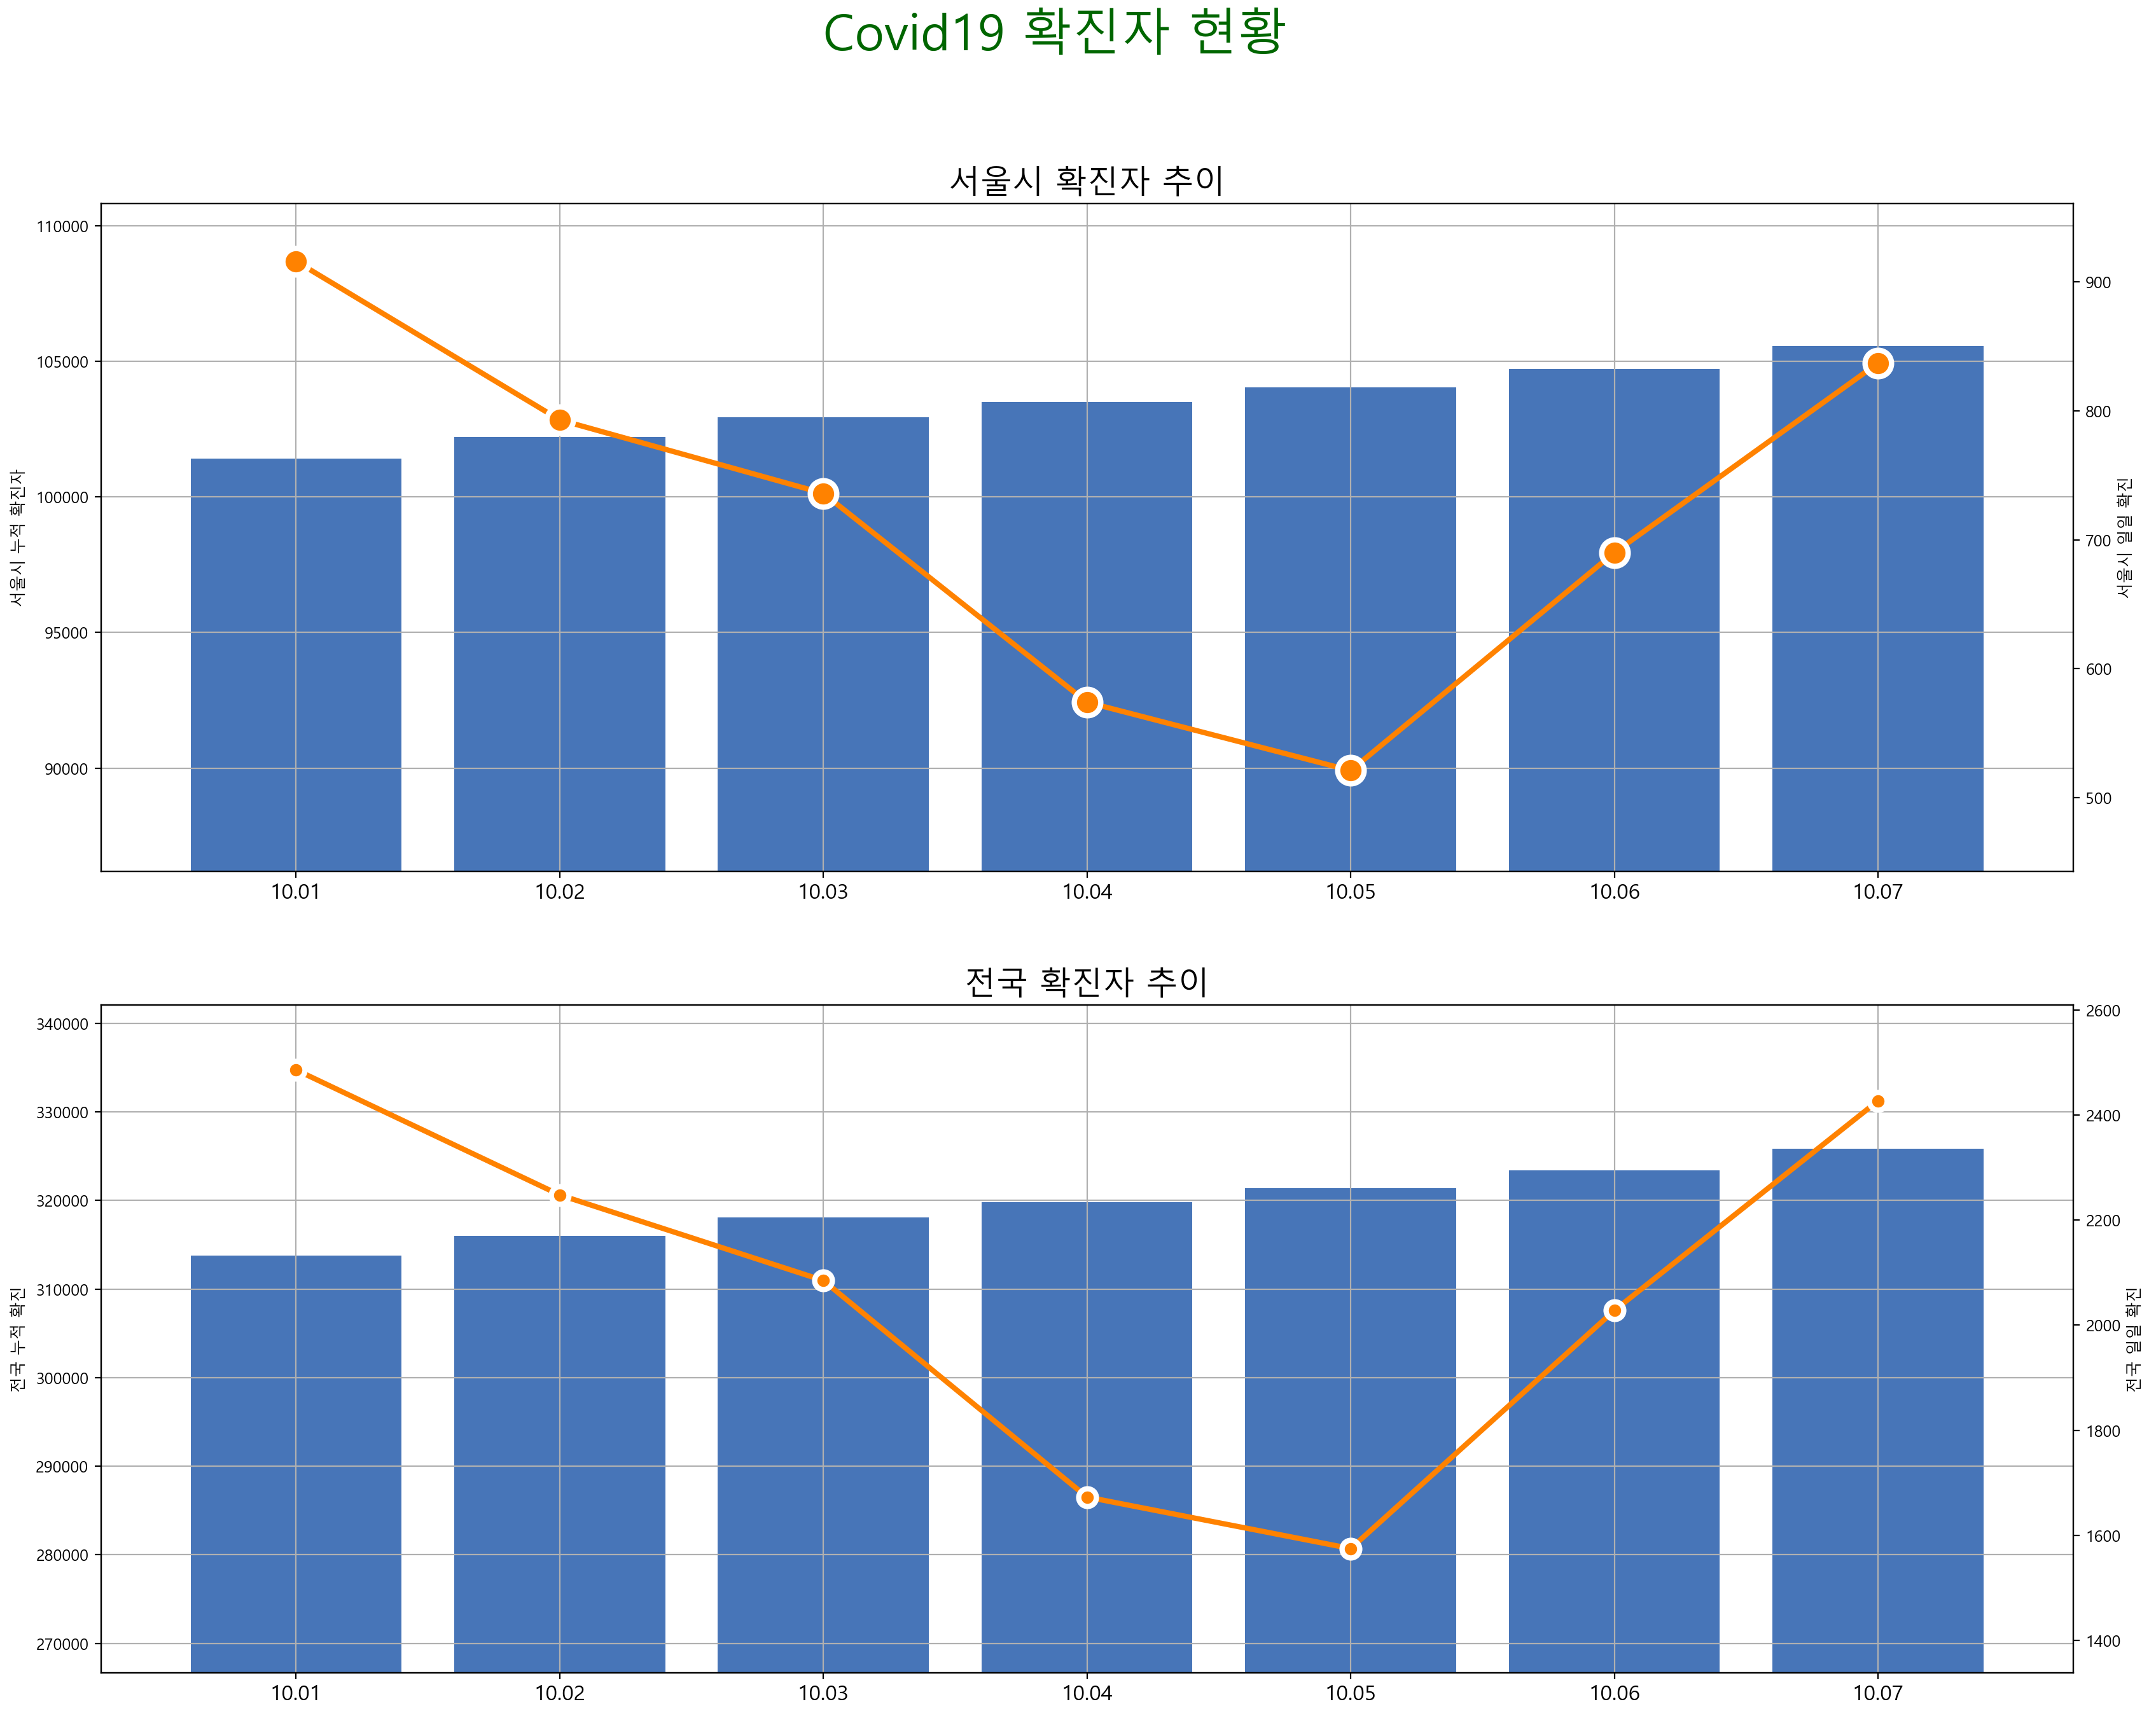

In [317]:
# 2행1열 서브플롯
fig, (ax1_left, ax2_left) = plt.subplots(2, 1, figsize=(20, 15))

# 각 서브플롯별로 twinx 생성
ax1_right = ax1_left.twinx()
ax2_right = ax2_left.twinx()

# 전체 제목
fig.suptitle('Covid19 확진자 현황', fontsize=28, color='#006600')

# 첫 번째 왼쪽 그래프
sb.barplot(data=df, x=x, y='서울시 누적 확진자', color="#3471CB", ax=ax1_left)
ax1_left.grid()
ax1_left.set_title('서울시 확진자 추이', fontsize=18)
ax1_left.set_ylim(서울시_누적_min, 서울시_누적_max)
ax1_left.set_xticks(x)
ax1_left.set_xticklabels(xticks, fontsize=12, rotation=0)

# 첫 번째 오른쪽 그래프
sb.lineplot(data=df, x=x, y='서울시 일일 확진', ax=ax1_right,
            color="#FF8200", linestyle='-', linewidth=3,
            marker="o", markersize=15, markerfacecolor="#FF8200",
            markeredgecolor="#ffffff", markeredgewidth=3)
ax1_right.set_ylim(서울시_일일_min, 서울시_일일_max)

# 두 번째 왼쪽 그래프
sb.barplot(data=df, x=x, y='전국 누적 확진', color="#3471CB", ax=ax2_left)
ax2_left.grid()
ax2_left.set_title('전국 확진자 추이', fontsize=18)
ax2_left.set_ylim(전국_누적_min, 전국_누적_max)
ax2_left.set_xticks(x)
ax2_left.set_xticklabels(xticks, fontsize=12, rotation=0)

# 두 번째 오른쪽 그래프
sb.lineplot(data=df, x=x, y='전국 일일 확진', ax=ax2_right,
            color="#FF8200", linestyle='-', linewidth=3,
            marker="o", markersize=10, markerfacecolor="#FF8200",
            markeredgecolor="#ffffff", markeredgewidth=3)
ax2_right.set_ylim(전국_일일_min, 전국_일일_max)

plt.show()
plt.close()